<a href="https://colab.research.google.com/github/AbyanAhmad/mlp-assignment-2/blob/main/tugas2_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas 2 MLP

1. Abyan Burhanuddin Ahmad
2. Aldi Tri Margiyono
3. Farhan Renaldi Nouval
4. Richie Imani



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Import Image

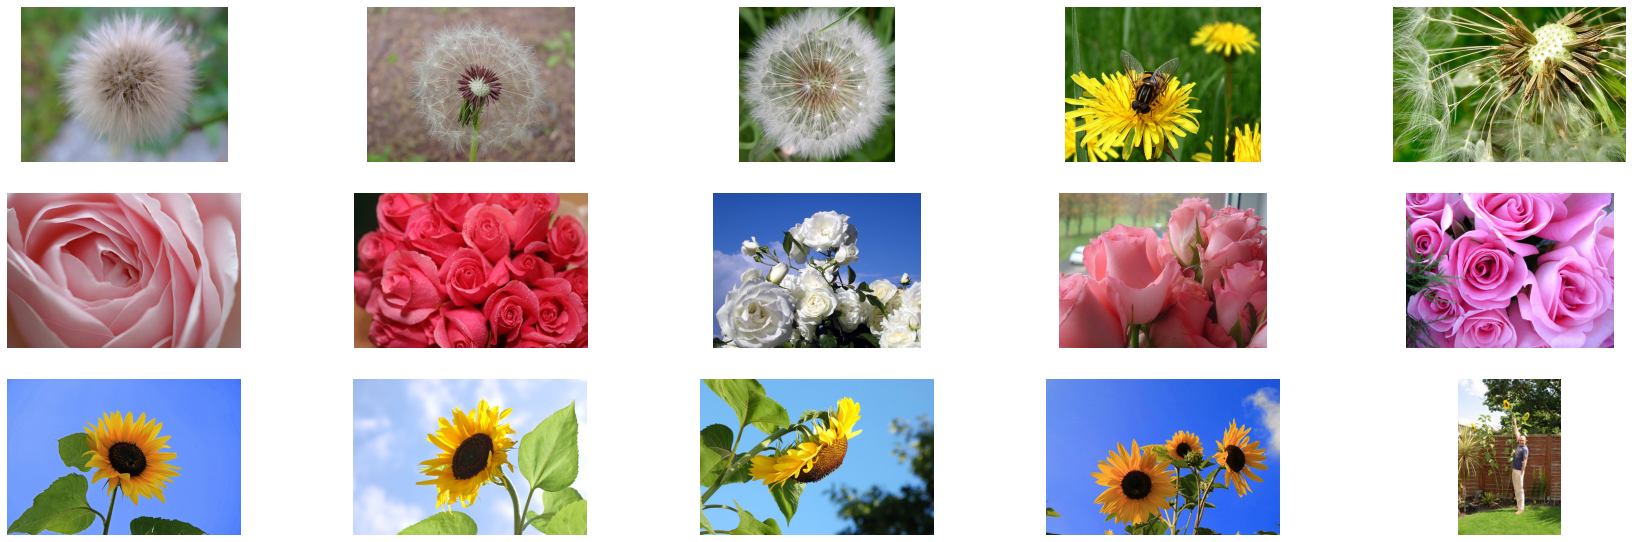

In [ ]:
dandelion_train = '/content/gdrive/Shared drives/tugas2-ml/dandelion/train'
dandelion_test = '/content/gdrive/Shared drives/tugas2-ml/dandelion/test'

rose_train = '/content/gdrive/Shared drives/tugas2-ml/rose/train'
rose_test = '/content/gdrive/Shared drives/tugas2-ml/rose/test'

sunflower_train = '/content/gdrive/Shared drives/tugas2-ml/sunflower/train'
sunflower_test = '/content/gdrive/Shared drives/tugas2-ml/sunflower/test'

dandelion_file = os.listdir(dandelion_train)
dandelion_pict = [os.path.join(dandelion_train, files) for files in dandelion_file[:5]]
rose_file = os.listdir(rose_train)
rose_pict = [os.path.join(rose_train, files) for files in rose_file[:5]]
sunflower_file = os.listdir(sunflower_train)
sunflower_pict = [os.path.join(sunflower_train, files) for files in sunflower_file[:5]]

#Show Train Image
plt.figure(figsize=(30,20))
for i, image in enumerate(dandelion_pict+rose_pict+sunflower_pict):
    img = mpimg.imread(image)  
    plt.subplot(6, 5, i + 1)
    plt.axis('off')
    plt.imshow(img)

# Convert Image to gray and resize

In [ ]:
dandelion_test_file = os.listdir(dandelion_test)
rose_test_file = os.listdir(rose_test)
sunflower_test_file = os.listdir(sunflower_test)

In [ ]:
def resize_cvt_to_gray (dir_path, name) :
  #Read Images
  images = []
  for filename in name:
      img = cv2.imread(os.path.join(dir_path,filename), cv2.IMREAD_UNCHANGED)
      images.append(img)

  #Resize and Convert to grays
  result_img = []
  size = (320,240)
  for i in range(len(images)):
    resize = cv2.resize(images[i], size, interpolation=cv2.INTER_LINEAR)
    gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    result_img.append(gray_img)
  return result_img

In [ ]:
#Convert and resize train img
resized_dandelion_train = resize_cvt_to_gray(dandelion_train, dandelion_file)
resized_rose_train = resize_cvt_to_gray(rose_train, rose_file)
resized_sunflower_train = resize_cvt_to_gray(sunflower_train, sunflower_file)
#Convert and resize test img
resized_dandelion_test = resize_cvt_to_gray(dandelion_test, dandelion_test_file)
resized_rose_test = resize_cvt_to_gray(rose_test, rose_test_file)
resized_sunflower_test = resize_cvt_to_gray(sunflower_test, sunflower_test_file)

# Show resized gray image

In [ ]:
def show_gray_img(image) :
  plt.figure(figsize=(30,20))
  for i in range(5) : 
    plt.subplot(6, 5, i + 1)
    plt.axis('off')
    plt.imshow(image[i], cmap='gray')

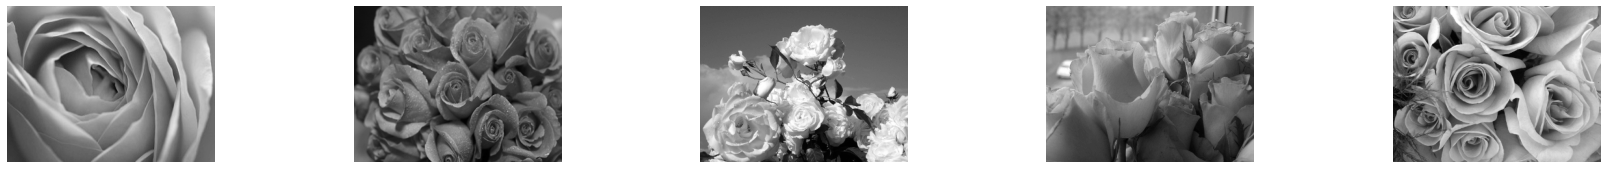

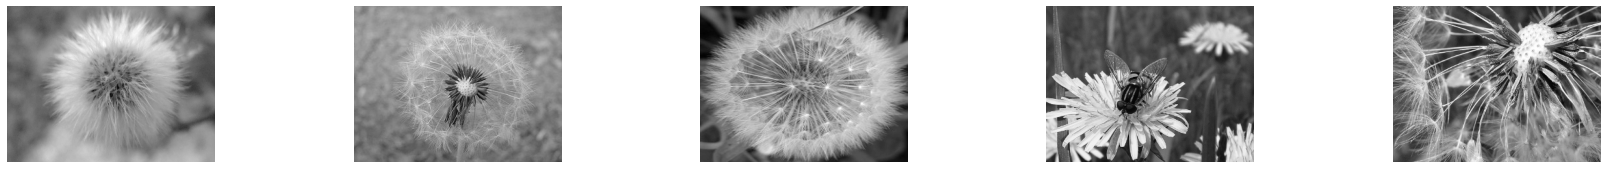

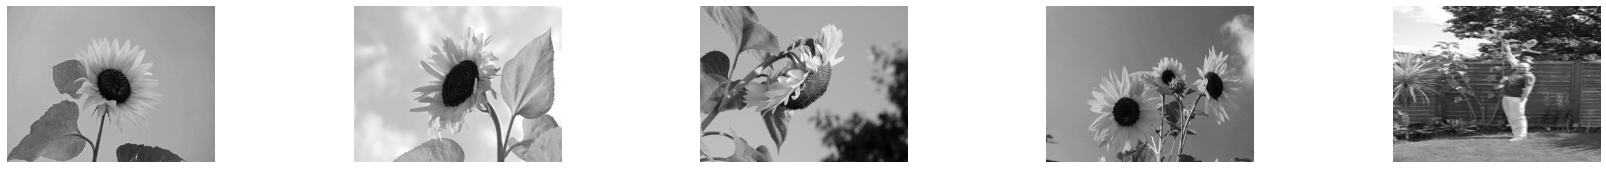

In [ ]:
show_gray_img(resized_rose_train)
show_gray_img(resized_dandelion_train)
show_gray_img(resized_sunflower_train)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
import random as rand
def inisialisasi(n_input, n_hidden, n_output):
  wh = [[rand.random() for i in range(n_input)] for j in range(n_hidden)]   #wh = weight dari input ke hidden layer
  wo = [[rand.random() for i in range(n_hidden)] for j in range(n_output)]  #wo = weight dari hidden ke output layer
  bh = [rand.random() for i in range(n_hidden)]                             #bh = bias neuron di hidden layer
  bo = [rand.random() for i in range(n_output)]                             #bo = bias neuron di output layer
  return wh, wo, bh, bo

n_input = 76800 #jumlah pixel dalam 1 image -> 320x340 = 76800 neuron
n_hidden = 3    #terserah mau berapa sih, aku samain hidden
n_output = 3    #one-hot encoding -> jumlah kelas = 3
wh, wo, bh, bo = inisialisasi(n_input, n_hidden, n_output)

In [ ]:
def costFunction(y, t): # y = prediksi, t = target
  error = 1/2*(y-t)**2
  return error

In [ ]:
def delta(output):
  return output * (1.0 - output)

In [ ]:
def calcResult(weight, theta):
  result = weight[-1]
  for i in range(len(weight)-1):
    result += weight[i] * theta[i]
  return result

In [ ]:
def feedforward (net, row):
  inputs = row
  for layer in net :
    nextInput = []
    for n in layer:
      result = calcResult(n[____],inputs)
      n[____] = sigmoid(result)
      nextInput.append(n[___])
    input = nextInput

In [ ]:
def backpropagation (network, target):
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = list()

    if i != (len(network)-1) :
      for j in range(len(layer)):
        e = 0.0
        for n in network[i+1]:
          e += (n[___][j] * n[___])
        errors.append(e)

    else :
      for j in range(len(layer)) :
        n = layer[j]
        errors.append(target[j] - n[___])
    
    for j in range(len(layer)):
      n = layer[j]
      n[___] = errors[j] * delta(n[___])

In [ ]:
def accuracy (actual, predicted) :
  correct = 0
  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct += 1
  return correct / float(len(actual))